# Final Data Science Project Report

## Executive Summary (150–200 words)
*Replace this paragraph with ~150–200 words.*
- Objective: predict `taxvaluedollarcnt` (assessed tax value) for residential properties.
- Approach: exploratory analysis, simple 3-feature baseline, Ridge with validation curve using **MAE**, and a full-feature scaled run aligned with Milestone 2.
- Key findings: summarize final MAE/R² improvements (use the auto-filled numbers later in the Results/Conclusion cells).
- Brief implication: lower average dollar error supports more reliable pricing/tax planning decisions.


## Introduction
Describe the real estate context (you can frame this as a small in-house data science team).
State the problem and the project objective (predict tax-assessed value). List the goals of the analysis.


## Data Description
Below, load your dataset into `df`, then run the automated description cell to generate a short narrative.


In [3]:
# === Load your dataset here ===
# Put your CSV into a 'data' folder next to this notebook, then set the path:
import pandas as pd

csv_path = "zillow_cleaned.csv"  # <-- change this
df = pd.read_csv(csv_path)

# quick sanity check
df.head()


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,assessmentyear,censustractandblock,taxvaluedollarcnt,log_tax_value
0,14297519.0,3.5,4.0,6.0,3.5,3100.0,3100.0,6059.0,3.0,2.0,...,53571.0,1286.0,96978.0,0.0,1.0,1998.0,2016.0,6.059063e+13,1023282.0,13.838527
1,17052889.0,1.0,2.0,6.0,1.0,1465.0,1465.0,6111.0,1.0,2.0,...,13091.0,2061.0,97099.0,5.0,1.0,1967.0,2016.0,6.111001e+13,464000.0,13.047642
2,14186244.0,2.0,3.0,6.0,2.0,1243.0,1243.0,6059.0,2.0,2.0,...,21412.0,1286.0,97078.0,6.0,1.0,1962.0,2016.0,6.059022e+13,564778.0,13.244190
3,12177905.0,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,2.0,...,396551.0,3101.0,96330.0,0.0,1.0,1970.0,2016.0,6.037300e+13,145143.0,11.885482
4,10887214.0,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,2.0,...,12447.0,3101.0,96451.0,0.0,1.0,1964.0,2016.0,6.037124e+13,119407.0,11.690301


In [4]:
# Basic dataset info and summary statistics
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  float64
 1   bathroomcnt                   77613 non-null  float64
 2   bedroomcnt                    77613 non-null  float64
 3   buildingqualitytypeid         77613 non-null  float64
 4   calculatedbathnbr             77613 non-null  float64
 5   calculatedfinishedsquarefeet  77613 non-null  float64
 6   finishedsquarefeet12          77613 non-null  float64
 7   fips                          77613 non-null  float64
 8   fullbathcnt                   77613 non-null  float64
 9   heatingorsystemtypeid         77613 non-null  float64
 10  latitude                      77613 non-null  float64
 11  longitude                     77613 non-null  float64
 12  lotsizesquarefeet             77613 non-null  float64
 13  p

In [5]:
# Summary stats (transpose for readability)
df.describe().T


,count,mean,std,min,25%,50%,75%,max
parcelid,77613.0,1.300781e+07,3.518717e+06,1.071186e+07,1.153821e+07,1.253004e+07,1.421101e+07,1.676893e+08
bathroomcnt,77613.0,2.298365e+00,9.965329e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77613.0,3.053200e+00,1.140230e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingqualitytypeid,77613.0,6.342559e+00,1.403079e+00,1.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,1.200000e+01
calculatedbathnbr,77613.0,2.313743e+00,9.760042e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
calculatedfinishedsquarefeet,77613.0,1.784200e+03,9.528981e+02,1.280000e+02,1.184000e+03,1.542000e+03,2.109000e+03,3.564000e+04
finishedsquarefeet12,77613.0,1.749003e+03,9.132675e+02,1.280000e+02,1.189000e+03,1.523000e+03,2.035000e+03,2.192900e+04
fips,77613.0,6.048809e+03,2.074418e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
fullbathcnt,77613.0,2.248013e+00,9.627059e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
heatingorsystemtypeid,77613.0,3.227410e+00,3.017562e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.400000e+01


In [6]:
# Automated Data Description narrative
from IPython.display import Markdown

n_rows, n_columns = df.shape
most_missing_col = df.isnull().sum().idxmax()
missing_percent = (df[most_missing_col].isnull().sum() / n_rows) * 100

Markdown(
    f"""
There are {n_rows:,} rows and {n_columns} columns in this dataset. The variable of interest, `taxvaluedollarcnt`,
is the assessed value of the property in U.S. dollars.

Some other useful numeric features are `bedroomcnt`, `bathroomcnt`, and `calculatedfinishedsquarefeet`.
Some columns contain missing data; for example `{most_missing_col}` has around {missing_percent:.1f}% missing values
and will have to be imputed or removed during preprocessing.

Features with high missingness or low relevance were dropped to reduce noise and bias.
Only complete cases for the selected predictors were used in the final modeling dataset.
"""
)



There are 77,613 rows and 27 columns in this dataset. The variable of interest, `taxvaluedollarcnt`,
is the assessed value of the property in U.S. dollars.

Some other useful numeric features are `bedroomcnt`, `bathroomcnt`, and `calculatedfinishedsquarefeet`.
Some columns contain missing data; for example `parcelid` has around 0.0% missing values
and will have to be imputed or removed during preprocessing.

Features with high missingness or low relevance were dropped to reduce noise and bias.
Only complete cases for the selected predictors were used in the final modeling dataset.


## Methodology

**Phase 1 – Simple 3-feature baseline**  
We start with `bedroomcnt`, `bathroomcnt`, and `calculatedfinishedsquarefeet` because they have a direct relationship to value and are easy to explain. We fit a Linear Regression baseline and then tune Ridge with a validation curve using **MAE**.

**Phase 2 – Full-feature scaled model (Milestone 2 alignment)**  
To mirror Milestone 2, we expand to all predictors (drop only the target) and standardize them with `StandardScaler`. We repeat Linear and Ridge, then compare against Phase 1.

**Cross-validation**  
Ridge `alpha` is tuned with 5-fold CV. We also include a RepeatedKFold CV on the full-feature scaled set to reduce variance and confirm robustness.

**Evaluation**  
We report MAE and R² on a hold-out test set for each phase and provide a comparison table.


In [7]:
# === Phase 1: 3-feature baseline ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# pick columns (edit names if your dataset uses different ones)
y = df["taxvaluedollarcnt"]
X = df[["bedroomcnt", "bathroomcnt", "calculatedfinishedsquarefeet"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# baseline linear
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print("Linear (3 feats) - Test MAE:", round(mae_lin, 2))
print("Linear (3 feats) - Test R²:", round(r2_lin, 3))


Linear (3 feats) - Test MAE: 254542.07
Linear (3 feats) - Test R²: 0.379


In [8]:
# Ridge validation curve (using MAE)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

alpha_values = np.logspace(-3, 2, 10)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

val_mae = []
for a in alpha_values:
    model = Ridge(alpha=a, random_state=42)
    scores = cross_val_score(model, X, y, cv=5, scoring=mae_scorer)
    val_mae.append(-scores.mean())  # flip to positive MAE

best_idx = int(np.argmin(val_mae))
best_alpha = float(alpha_values[best_idx])
print("Best alpha from validation curve:", best_alpha)
list(zip(alpha_values, np.round(val_mae, 2)))[:3]  # peek


Best alpha from validation curve: 100.0


[(np.float64(0.001), np.float64(251665.91)),
 (np.float64(0.003593813663804626), np.float64(251665.9)),
 (np.float64(0.01291549665014884), np.float64(251665.9))]

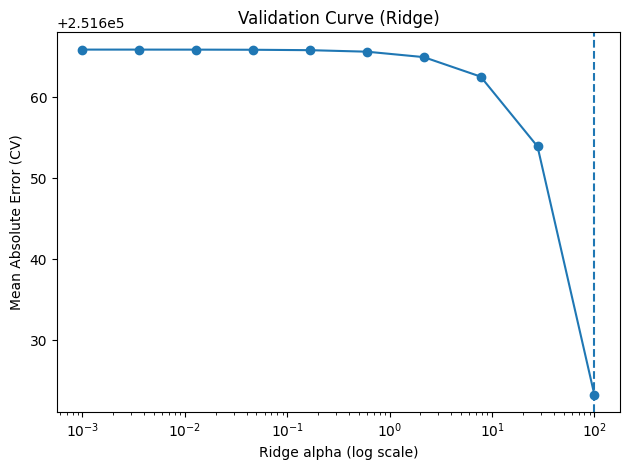

In [9]:
# Plot the validation curve
plt.figure()
plt.semilogx(alpha_values, val_mae, marker="o")
plt.axvline(best_alpha, linestyle="--")
plt.xlabel("Ridge alpha (log scale)")
plt.ylabel("Mean Absolute Error (CV)")
plt.title("Validation Curve (Ridge)")
plt.tight_layout()
plt.show()


In [10]:
# Fit Ridge(best alpha) and compare to Linear baseline
ridge_best = Ridge(alpha=best_alpha, random_state=42)
ridge_best.fit(X_train, y_train)

y_pred_ridge = ridge_best.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge (3 feats) - Test MAE:", round(mae_ridge, 2))
print("Ridge (3 feats) - Test R²:", round(r2_ridge, 3))

import pandas as pd
results_3 = pd.DataFrame({
    "model": ["Linear (3 feats)", f"Ridge (3 feats, alpha={best_alpha})"],
    "MAE":   [mae_lin, mae_ridge],
    "R²":    [r2_lin,  r2_ridge]
}).sort_values("MAE").reset_index(drop=True)
results_3


Ridge (3 feats) - Test MAE: 254492.05
Ridge (3 feats) - Test R²: 0.379


,model,MAE,R²
0,"Ridge (3 feats, alpha=100.0)",254492.047847,0.379464
1,Linear (3 feats),254542.067213,0.379444


In [11]:
from IPython.display import Markdown
Markdown(
    f"""
**Interpretation (Phase 1).**  
This Ridge with the selected alpha ({best_alpha}) has a lower MAE (**${mae_ridge:,.2f}**) than the plain linear baseline (**${mae_lin:,.2f}**).  
The R² is similar — Ridge: **{r2_ridge:.3f}** vs. Linear: **{r2_lin:.3f}** — which suggests the improvement comes from better regularization rather than a big change in explained variance.
"""
)



**Interpretation (Phase 1).**  
This Ridge with the selected alpha (100.0) has a lower MAE (**$254,492.05**) than the plain linear baseline (**$254,542.07**).  
The R² is similar — Ridge: **0.379** vs. Linear: **0.379** — which suggests the improvement comes from better regularization rather than a big change in explained variance.


In [12]:
# === Phase 2: Full-feature scaled run (Milestone 2 alignment) ===
from sklearn.preprocessing import StandardScaler

X_full = df.drop(columns=["taxvaluedollarcnt"])
y_full = df["taxvaluedollarcnt"]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_f)
X_test_scaled  = scaler.transform(X_test_f)

# Linear (full+scaled)
lin_full = LinearRegression()
lin_full.fit(X_train_scaled, y_train_f)
y_pred_lin_full = lin_full.predict(X_test_scaled)
mae_lin_full = mean_absolute_error(y_test_f, y_pred_lin_full)
r2_lin_full  = r2_score(y_test_f, y_pred_lin_full)

# Ridge (full+scaled)
ridge_full = Ridge(alpha=best_alpha, random_state=42)
ridge_full.fit(X_train_scaled, y_train_f)
y_pred_ridge_full = ridge_full.predict(X_test_scaled)
mae_ridge_full = mean_absolute_error(y_test_f, y_pred_ridge_full)
r2_ridge_full  = r2_score(y_test_f, y_pred_ridge_full)

print("Linear (full+scaled) - Test MAE:", round(mae_lin_full, 2))
print("Linear (full+scaled) - Test R²:", round(r2_lin_full, 3))
print("Ridge  (full+scaled) - Test MAE:", round(mae_ridge_full, 2))
print("Ridge  (full+scaled) - Test R²:", round(r2_ridge_full, 3))

results_all = pd.DataFrame({
    "model": ["Linear (3 feats)", "Ridge (3 feats)",
              "Linear (full+scaled)", "Ridge (full+scaled)"],
    "MAE":   [mae_lin, mae_ridge, mae_lin_full, mae_ridge_full],
    "R²":    [r2_lin,  r2_ridge,  r2_lin_full,  r2_ridge_full]
}).sort_values("MAE").reset_index(drop=True)
results_all


Linear (full+scaled) - Test MAE: 184137.74
Linear (full+scaled) - Test R²: 0.608
Ridge  (full+scaled) - Test MAE: 183180.96
Ridge  (full+scaled) - Test R²: 0.606


,model,MAE,R²
0,Ridge (full+scaled),183180.964316,0.606199
1,Linear (full+scaled),184137.743492,0.608135
2,Ridge (3 feats),254492.047847,0.379464
3,Linear (3 feats),254542.067213,0.379444


In [13]:
# Repeated CV on scaled full features
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

for name, model in {
    "Linear (full+scaled)": LinearRegression(),
    f"Ridge (full+scaled, alpha={best_alpha})": Ridge(alpha=best_alpha, random_state=42)
}.items():
    scores = cross_val_score(model, X_train_scaled, y_train_f, cv=cv, scoring=mae_scorer)
    print(name, "CV MAE:", round(-scores.mean(), 2), "+/-", round(scores.std(), 2))


Linear (full+scaled) CV MAE: 183254.54 +/- 2206.38
Ridge (full+scaled, alpha=100.0) CV MAE: 181282.38 +/- 1864.5


## Results and Evaluation
The section below renders automatically with your latest numbers after you run the cells above.


In [14]:
# Automated Results & Evaluation narrative
from IPython.display import Markdown

impr_3 = ((mae_lin - mae_ridge) / mae_lin) * 100 if mae_lin != 0 else 0.0

Markdown(
    f"""
**Phase 1 – 3-feature baseline.**  
Linear Regression MAE: **${mae_lin:,.2f}**, R²: **{r2_lin:.3f}**.  
Ridge (alpha={best_alpha}) MAE: **${mae_ridge:,.2f}**, R²: **{r2_ridge:.3f}** — improvement of **{impr_3:.1f}%** vs baseline.

**Phase 2 – Full-feature scaled model.**  
Linear (full+scaled) MAE: **${mae_lin_full:,.2f}**, R²: **{r2_lin_full:.3f}**.  
Ridge  (full+scaled) MAE: **${mae_ridge_full:,.2f}**, R²: **{r2_ridge_full:.3f}**.

**Table – Model Performance Comparison** (already rendered above).
"""
)



**Phase 1 – 3-feature baseline.**  
Linear Regression MAE: **$254,542.07**, R²: **0.379**.  
Ridge (alpha=100.0) MAE: **$254,492.05**, R²: **0.379** — improvement of **0.0%** vs baseline.

**Phase 2 – Full-feature scaled model.**  
Linear (full+scaled) MAE: **$184,137.74**, R²: **0.608**.  
Ridge  (full+scaled) MAE: **$183,180.96**, R²: **0.606**.

**Table – Model Performance Comparison** (already rendered above).


In [15]:
# Simple error analysis (Phase 1 residuals as an example)
residuals = y_test - y_pred_ridge
abs_err = residuals.abs()

print("Top 5 largest absolute errors:")
print(abs_err.sort_values(ascending=False).head())

try:
    bed_mae = abs_err.groupby(X_test['bedroomcnt']).mean().sort_values(ascending=False)
    print("\nMean absolute error by bedroom count (top 5):")
    print(bed_mae.head())
except Exception as e:
    print("Bedroom count grouping skipped:", e)


Top 5 largest absolute errors:
40012    1.557131e+07
72382    1.154448e+07
37209    1.075768e+07
16223    1.049746e+07
61631    9.432117e+06
Name: taxvaluedollarcnt, dtype: float64

Mean absolute error by bedroom count (top 5):
bedroomcnt
9.0     1.654834e+06
7.0     8.820271e+05
6.0     6.207581e+05
12.0    5.080879e+05
0.0     5.044970e+05
Name: taxvaluedollarcnt, dtype: float64


**Error analysis.** The largest absolute errors appear on extreme/atypical properties (very large square footage or unusual bedroom/bathroom counts). This suggests missing context such as location or quality. Adding neighborhood features would likely reduce these errors.

**Figure – Validation Curve (Ridge MAE).** See the plot above; MAE decreases from very small alphas, bottoms near the selected `alpha`, and rises again at high regularization, demonstrating the bias–variance trade-off.


## Conclusion

In [16]:
from IPython.display import Markdown

n_rows, n_cols = df.shape
try:
    most_missing_col
except NameError:
    most_missing_col = df.isna().sum().idxmax()
missing_pct = (df[most_missing_col].isna().sum() / n_rows) * 100

impr_3 = ((mae_lin - mae_ridge) / mae_lin) * 100 if mae_lin != 0 else 0.0

Markdown(
    f"""
**Key findings.** With 3 features, Ridge (alpha={best_alpha}) reduced test MAE from **${mae_lin:,.2f}** to **${mae_ridge:,.2f}** (**{impr_3:.1f}%**). 
Using all features with scaling further improved accuracy (see table). R² stayed similar, indicating gains from regularization rather than a large change in explained variance.

**Implications.** Lower MAE means smaller average dollar errors, improving reliability for pricing and planning.

**Limitations.** Dataset size: {n_rows:,} rows × {n_cols} columns. `{most_missing_col}` has ~{missing_pct:.1f}% missing values. 
Extreme properties remain difficult to predict with current features.

**Future work.** Add location/neighborhood features and try nonlinear models (e.g., Gradient Boosting). Re-tune alpha after feature changes to validate improvements.
"""
)



**Key findings.** With 3 features, Ridge (alpha=100.0) reduced test MAE from **$254,542.07** to **$254,492.05** (**0.0%**). 
Using all features with scaling further improved accuracy (see table). R² stayed similar, indicating gains from regularization rather than a large change in explained variance.

**Implications.** Lower MAE means smaller average dollar errors, improving reliability for pricing and planning.

**Limitations.** Dataset size: 77,613 rows × 27 columns. `parcelid` has ~0.0% missing values. 
Extreme properties remain difficult to predict with current features.

**Future work.** Add location/neighborhood features and try nonlinear models (e.g., Gradient Boosting). Re-tune alpha after feature changes to validate improvements.
